# Hollin Hill LF-DAS
## Part 2: Data analysis workflow

Susanne Ouellet, PhD candidate at University of Calgary

- email: *susanne.ouellet2@ucalgary.ca*
- Github repository: *https://github.com/smouellet/hhdas/*

Subsequent notebook to '01_LF-DAS_processing.ipynb' (Notebook 1). 
Reads in the processed strain and strain rate data created in Notebook 1 along with environmental sensor data. 


In [1]:
# Import necessary packages

import h5py
import obspy
from obspy import UTCDateTime
from datetime import datetime
import pandas as pd
import numpy as np
import os, glob
import matplotlib.pyplot as plt
from scipy import signal

import zarr
import xarray as xr

from celluloid import Camera # for animations

## Load in environmental site data


### Load Cosmos weather station data
Includes precipitation, air temperature, atmospheric pressure, soil temperature, etc.


In [2]:
# Load environmental site data for January
wthrstn_data = '/Users/souellet/research/hollinhill/cosmos_data_202101.csv' # cosmos weather station data for January (includes precipitation, air temperature, atmospheric pressure, soil temperature, etc.)
df = pd.read_csv(wthrstn_data)
df['date'] = pd.to_datetime(df['date'])

# Resetting the index
df.set_index('date', inplace=True)
dff = df.loc["2021-01-12":"2021-01-15"]  # sub selection of environmental site data from January 12 to 15 for comparison with DAS dataset

## Load in low frequency DAS data

In [5]:
#######################################################
### imported in order from westward moving eastward ###
#######################################################

s1 = xr.open_dataarray("s1.nc")                      # load strain data, tight-buffered.                 *** ch1058 at crest
srate1 = xr.open_dataarray("srate1.nc")              # load strain rate data, tight-buffered.            *** ch1058 at crest

s2 = xr.open_dataarray("s2.nc")                      # load strain data, tight-buffered.                 *** ch1208 at toe
srate2 = xr.open_dataarray("srate2.nc")              # load strain rate data, tight-buffered.            *** ch1208 at toe

s3 = xr.open_dataarray("s3.nc")                      # load strain data, tight-buffered.                 *** ch1366 at crest
srate3= xr.open_dataarray("srate3.nc")               # load strain rate data, tight-buffered.            *** ch1366 at crest

s4 = xr.open_dataarray("s4.nc")                      # load strain data, tight-buffered.                 *** ch1504 at toe
srate4 = xr.open_dataarray("srate4.nc")              # load strain rate data, tight-buffered.            *** ch1504 at toe

s5 = xr.open_dataarray("s5.nc")                      # load strain data, tight-buffered.                 *** ch1656 at crest
srate5 = xr.open_dataarray("srate5.nc")              # load strain rate data, tight-buffered.            *** ch1656 at crest    

s6 = xr.open_dataarray("s6.nc")                      # load strain data, tight-buffered.                 *** ch880 at toe 
srate6 = xr.open_dataarray("srate6.nc")              # load strain rate data, tight-buffered.            *** ch880 at toe



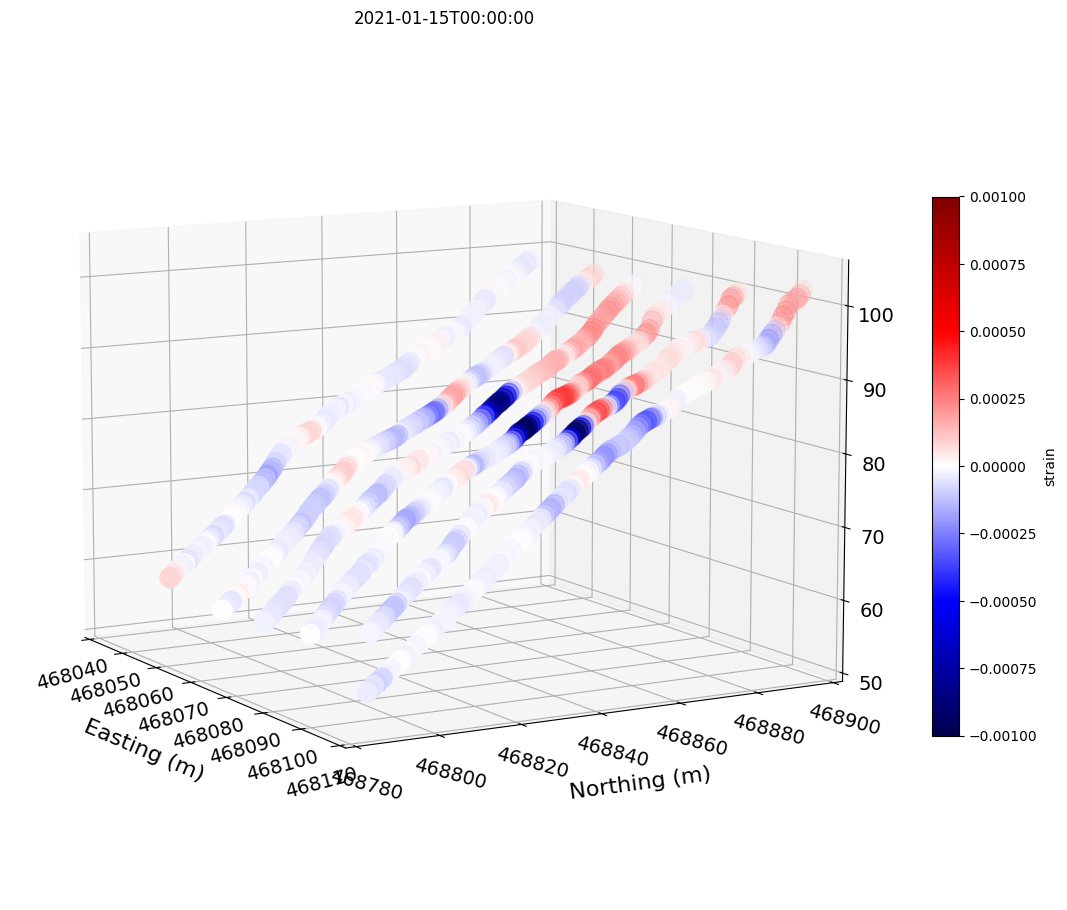

In [6]:
# TESTING 3D PLOT

ax = plt.figure(figsize = (14,14)).add_subplot(projection='3d')

# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x, y) points are plotted on the x and z axes.

timea = '2021-01-13T23:00:00'
timeb = '2021-01-14T02:13:00' # update figure
timec = '2021-01-14T12:00:00'
timed = '2021-01-14T16:00:00'
timee = '2021-01-15T00:00:00'

#timetemp = timee
timey = timee

# Define a larger size for the scatter plot markers
marker_size = 200  # Adjust this value as needed

ax.scatter(s4.loc[:,1560].coords['x'], s4.loc[:,1560].coords['y'], zs=s4.loc[:,1560].coords['z'],s=(100,),c='k',marker='o') #, zdir='y', c='r', label='points in (x, z)')

cb = ax.scatter(s1.coords['x'], s1.coords['y'], zs=srate1.coords['z'], s=marker_size, label='1', c=s1.sel(time=timey), cmap='seismic', vmin=-1e-3, vmax=1e-3)
ax.scatter(s2.coords['x'], s2.coords['y'], zs=s2.coords['z'], s=marker_size, label='2', c=s2.sel(time=timey), cmap='seismic', vmin=-1e-3, vmax=1e-3)
ax.scatter(s3.coords['x'], s3.coords['y'], zs=s3.coords['z'], s=marker_size, label='3', c=s3.sel(time=timey), cmap='seismic', vmin=-1e-3, vmax=1e-3)
ax.scatter(s4.coords['x'], s4.coords['y'], zs=s4.coords['z'], s=marker_size, label='4', c=s4.sel(time=timey), cmap='seismic', vmin=-1e-3, vmax=1e-3)
ax.scatter(s5.coords['x'], s5.coords['y'], zs=s5.coords['z'], s=marker_size, label='5', c=s5.sel(time=timey), cmap='seismic', vmin=-1e-3, vmax=1e-3)
ax.scatter(s6.coords['x'], s6.coords['y'], zs=s6.coords['z'], s=marker_size, label='6', c=s6.sel(time=timey), cmap='seismic', vmin=-1e-3, vmax=1e-3)


# Make legend, set axes limits and labels
ax.set_xlim(468040,468110)
ax.set_ylim(468780,468900)
ax.set_zlim(50,105)

# Set the font size for axis labels
label_font_size = 16  # You can adjust this value as needed
ax.set_xlabel('Easting (m)', fontsize=label_font_size)
ax.set_ylabel('Northing (m)', fontsize=label_font_size)
ax.set_zlabel('Elevation (m)', fontsize=label_font_size)

# Set the font size for tick labels
tick_font_size = 14  # You can adjust this value as needed
ax.tick_params(axis='x', labelsize=tick_font_size)
ax.tick_params(axis='y', labelsize=tick_font_size)
ax.tick_params(axis='z', labelsize=tick_font_size)


# Rotate labels for better spacing
for label in ax.get_xticklabels():
    label.set_rotation(15)
for label in ax.get_yticklabels():
    label.set_rotation(-15)

# Increase label padding
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
ax.zaxis.labelpad = 20

# Customize the view angle so it's easier to see that the scatter points lie on the plane y=0
ax.view_init(elev=10., azim=-30)
plt.colorbar(cb, shrink=0.5, aspect=20,label='strain')

plt.title(timey)

plt.show()

### Create map with channel ID labels

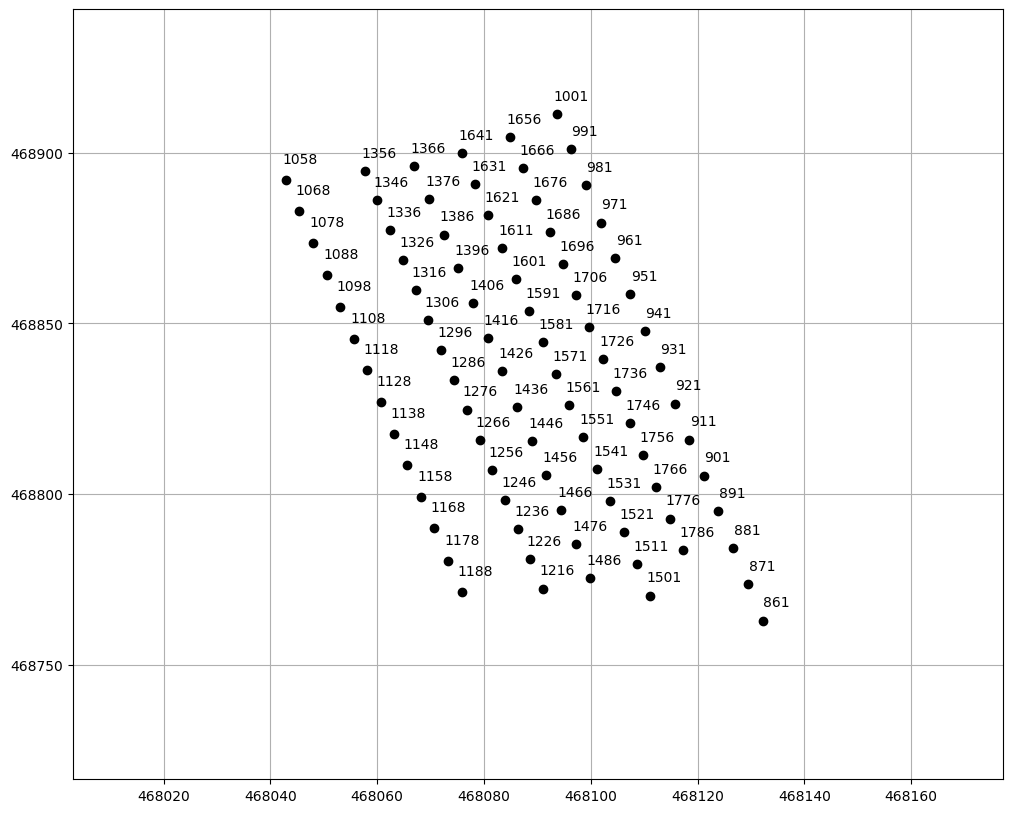

In [7]:
easting = s1['x']
northing = s1['y']
label = np.asarray(s1.channels)
elev = s1['z']

xmin = np.min(s1['x']) - 40
xmax = np.max(s1['x']) + 100

ymin = np.min(s1['y']) - 50
ymax = np.max(s1['y']) + 50

fig = plt.figure(figsize = (12,10))

# LINE 1
dasE = s1['x']
dasN = s1['y']
dasLabel = np.asarray(s1.channels)
allchan = s1.channels.shape[0]
for ichan in range(0,allchan,10):
    plt.plot(dasE[ichan],dasN[ichan],'ok',alpha=1)
    dlabel = dasLabel[ichan] #"{:.2f}".format(y)
    plt.annotate(dlabel, # this is the text
                 (dasE[ichan],dasN[ichan]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,12), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


# LINE 2
dasE = s2['x']
dasN = s2['y']
dasLabel = np.asarray(s2.channels)
allchan = s2.channels.shape[0]
for ichan in range(0,allchan,10):
    plt.plot(dasE[ichan],dasN[ichan],'ok',alpha=1)
    dlabel = dasLabel[ichan] #"{:.2f}".format(y)
    plt.annotate(dlabel, # this is the text
                 (dasE[ichan],dasN[ichan]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# LINE 3
dasE = s3['x']
dasN = s3['y']
dasLabel = np.asarray(s3.channels)
allchan = s3.channels.shape[0]
for ichan in range(0,allchan,10):
    plt.plot(dasE[ichan],dasN[ichan],'ok',alpha=1)
    dlabel = dasLabel[ichan] #"{:.2f}".format(y)
    plt.annotate(dlabel, # this is the text
                 (dasE[ichan],dasN[ichan]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# LINE 4
dasE = s4['x']
dasN = s4['y']
dasLabel = np.asarray(s4.channels)
allchan = s4.channels.shape[0]
for ichan in range(0,allchan,10):
    plt.plot(dasE[ichan],dasN[ichan],'ok',alpha=1)
    dlabel = dasLabel[ichan] #"{:.2f}".format(y)
    plt.annotate(dlabel, # this is the text
                 (dasE[ichan],dasN[ichan]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

    
# LINE 5
dasE = s5['x']
dasN = s5['y']
dasLabel = np.asarray(s5.channels)
allchan = s5.channels.shape[0]
for ichan in range(0,allchan,10):
    plt.plot(dasE[ichan],dasN[ichan],'ok',alpha=1)
    dlabel = dasLabel[ichan] #"{:.2f}".format(y)
    plt.annotate(dlabel, # this is the text
                 (dasE[ichan],dasN[ichan]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
# LINE 6
dasE = s6['x']
dasN = s6['y']
dasLabel = np.asarray(s6.channels)
allchan = s6.channels.shape[0]
for ichan in range(0,allchan,10):
    plt.plot(dasE[ichan],dasN[ichan],'ok',alpha=1)
    dlabel = dasLabel[ichan] #"{:.2f}".format(y)
    plt.annotate(dlabel, # this is the text
                 (dasE[ichan],dasN[ichan]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
    
    
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.grid()

In [8]:
s3['time'][-1]

<xarray.DataArray 'time' ()>
array('2021-01-15T14:39:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2021-01-15T14:39:59

### 2D STRAIN PLOT

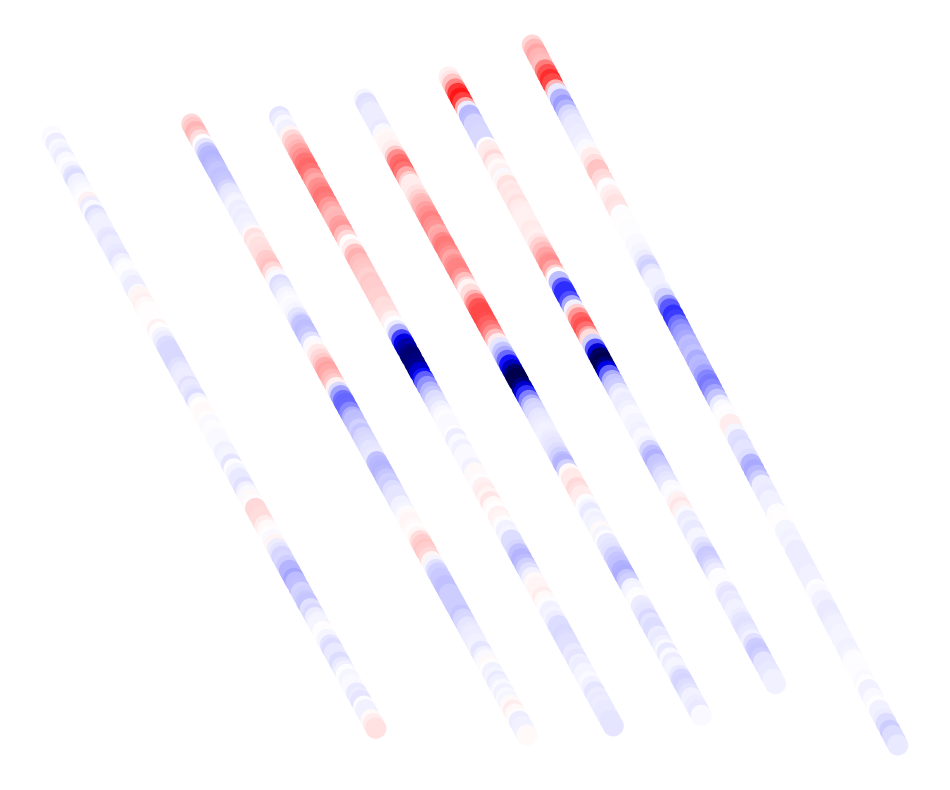

In [12]:
easting = s1['x']
northing = s1['y']

xmin = np.min(s1['x']) - 40
xmax = np.max(s1['x']) + 100

ymin = np.min(s1['y']) - 50
ymax = np.max(s1['y']) + 50

vmin = -1e-3
vmax = 1e-3

# KEY TIMES
timea = '2021-01-13T20:30:00'
timeb = '2021-01-13T23:55:00'
timec = '2021-01-14T10:00:00' # update figure
timed = '2021-01-14T12:00:00'
timee = '2021-01-14T15:00:00'
timef = '2021-01-15T11:00:00'

timey = timef

msize = 200
#cs = plt.scatter(srate3.coords["X"],srate3.coords["z"],c=srate3.sel(time = timey),cmap='seismic',vmin=vmin,vmax=vmax)

fig = plt.figure(figsize = (12,10))


cs = plt.scatter(s1.coords['x'], s1.coords['y'], s = msize,label='1',c=s1.sel(time = timey),cmap='seismic',vmin=vmin,vmax=vmax) #, zdir='y', c='r', label='points in (x, z)')
plt.scatter(s2.coords['x'], s2.coords['y'], s=msize,label='2',c=s2.sel(time = timey),cmap='seismic',vmin=vmin,vmax=vmax) #, zdir='y', c='r', label='points in (x, z)')
plt.scatter(s3.coords['x'], s3.coords['y'], s=msize,label='3',c=s3.sel(time = timey),cmap='seismic',vmin=vmin,vmax=vmax) #, zdir='y', c='r', label='points in (x, z)')
plt.scatter(s4.coords['x'], s4.coords['y'], s=msize,label='4',c=s4.sel(time = timey),cmap='seismic',vmin=vmin,vmax=vmax) #, zdir='y', c='r', label='points in (x, z)')
plt.scatter(s5.coords['x'], s5.coords['y'], s=msize,label='5',c=s5.sel(time = timey),cmap='seismic',vmin=vmin,vmax=vmax) #, zdir='y', c='r', label='points in (x, z)')
plt.scatter(s6.coords['x'], s6.coords['y'],s=msize,label='6',c=s6.sel(time = timey),cmap='seismic',vmin=vmin,vmax=vmax) #, zdir='y', c='r', label='points in (x, z)')

plt.axis('off')

#plt.colorbar(cs)
plt.savefig('strain2d %s.png' % timey, transparent=True)



### Strain rate figures

#### Strain Rate - L1

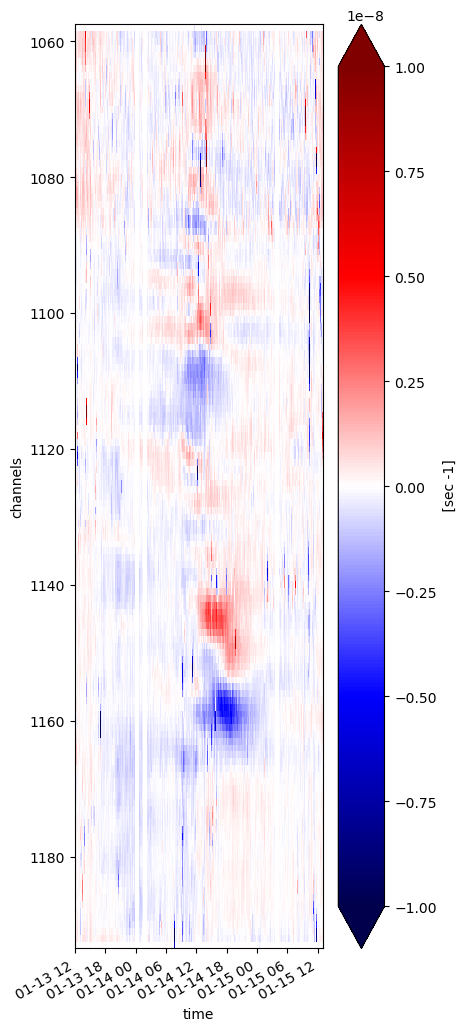

In [126]:
fig = plt.figure(figsize = (4,12))

srate2d = srate1.loc['2021-01-13T12':'2021-01-15T12'].T.plot(cmap='seismic',vmin=-1e-8,vmax=1e-8)
plt.gca().invert_yaxis()

plt.savefig('srate_2d_L1.svg')


#### Strain Rate - L2

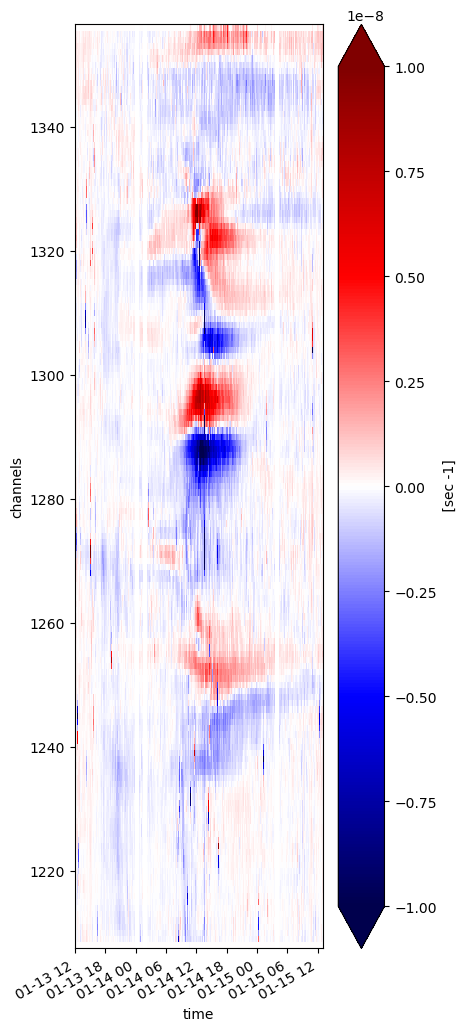

In [38]:
fig = plt.figure(figsize = (4,12))

srate2d = srate2.loc['2021-01-13T12':'2021-01-15T12'].T.plot(cmap='seismic',vmin=-1e-8,vmax=1e-8)
plt.savefig('srate_2d_L2.pdf')


#### Strain Rate - L3

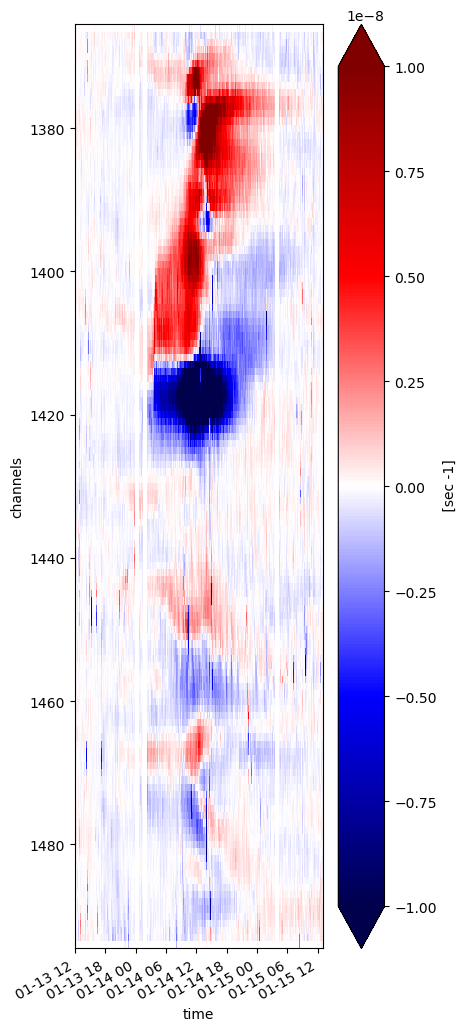

In [74]:
fig = plt.figure(figsize = (4,12))

srate2d = srate3.loc['2021-01-13T12':'2021-01-15T12'].T.plot(cmap='seismic',vmin=-1e-8,vmax=1e-8)
plt.gca().invert_yaxis()

#### Strain Rate - L4

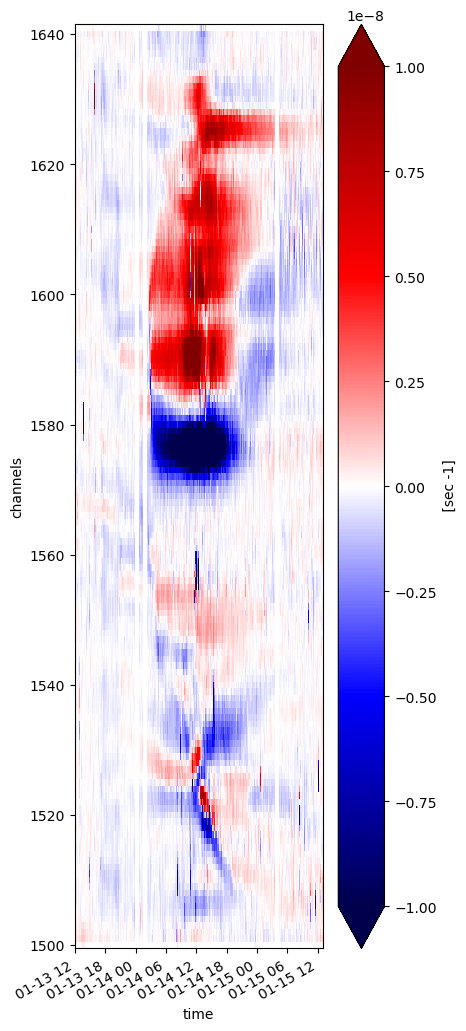

In [14]:
fig = plt.figure(figsize = (4,12))

srate2d = srate4.loc['2021-01-13T12':'2021-01-15T12'].T.plot(cmap='seismic',vmin=-1e-8,vmax=1e-8)
#plt.gca().invert_yaxis()

#### Strain Rate - L5

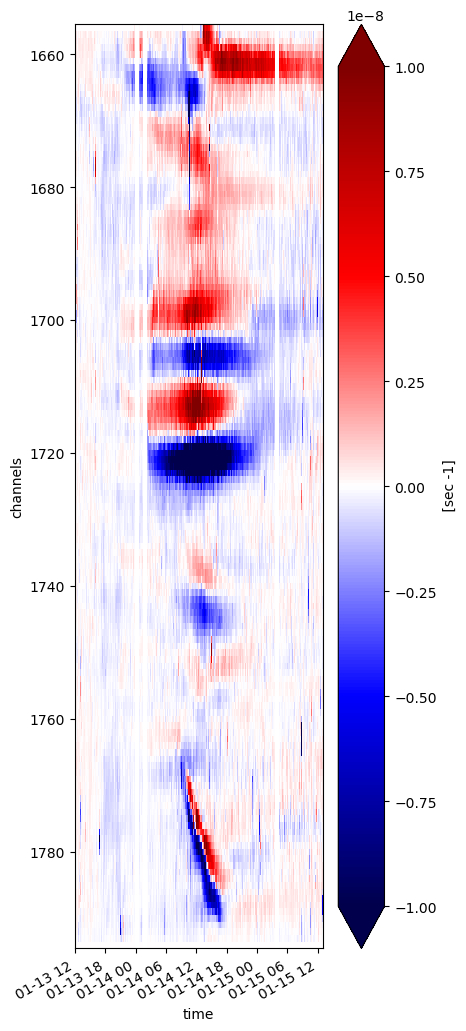

In [15]:
fig = plt.figure(figsize = (4,12))

srate2d = srate5.loc['2021-01-13T12':'2021-01-15T12'].T.plot(cmap='seismic',vmin=-1e-8,vmax=1e-8)
plt.gca().invert_yaxis()

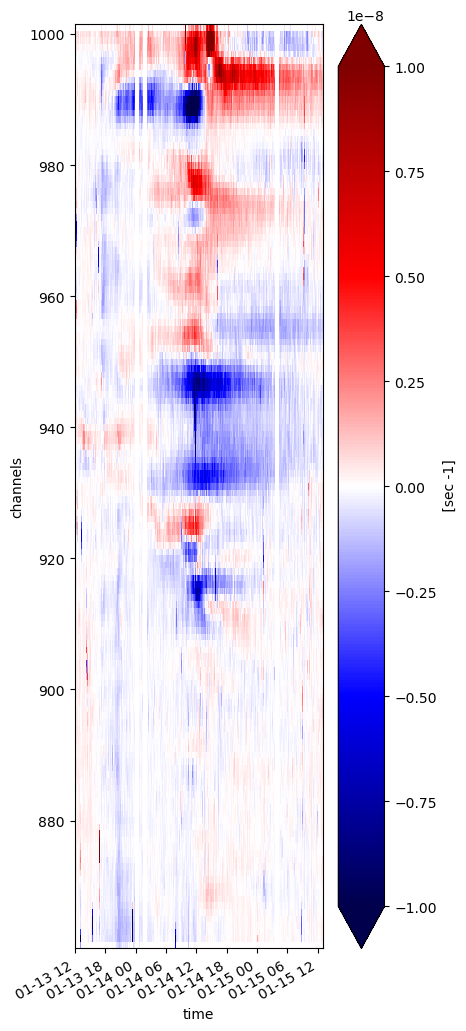

In [17]:
fig = plt.figure(figsize = (4,12))

srate2d = srate6.loc['2021-01-13T12':'2021-01-15T12'].T.plot(cmap='seismic',vmin=-1e-8,vmax=1e-8)
#plt.gca().invert_yaxis()

In [59]:
timewin = 600

srate1mn = srate1.rolling(time=timewin, center=True).mean().dropna("time")
srate2mn = srate2.rolling(time=timewin, center=True).mean().dropna("time")
srate3mn = srate3.rolling(time=timewin, center=True).mean().dropna("time")
srate4mn = srate4.rolling(time=timewin, center=True).mean().dropna("time")
srate5mn = srate5.rolling(time=timewin, center=True).mean().dropna("time")
srate6mn = srate6.rolling(time=timewin, center=True).mean().dropna("time")


### 2D STRAIN & STRAIN RATE PLOTS COMPARED TO RAINFALL & MOISTURE

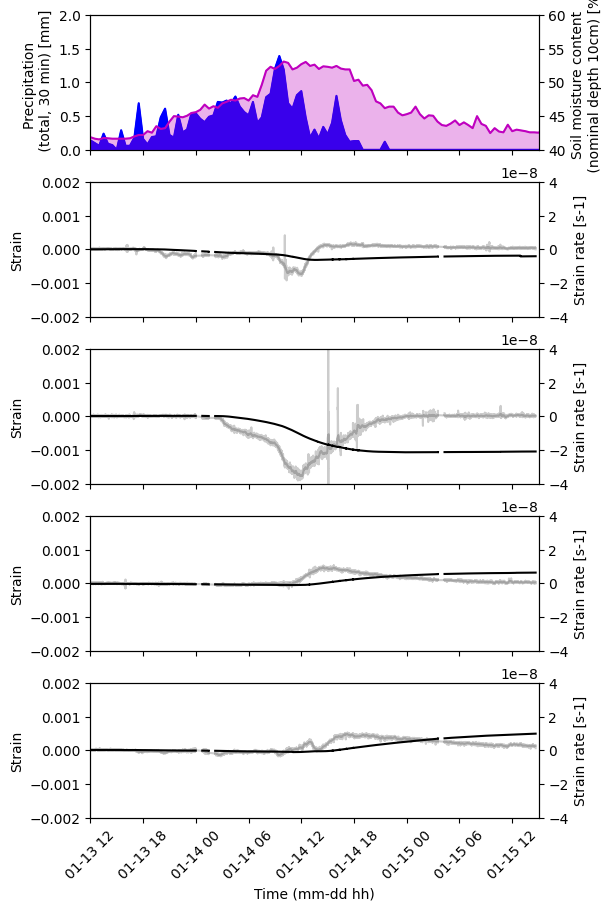

In [77]:
fig, (ax1,ax3,ax5,ax7,ax9) = plt.subplots(5, sharex=True, sharey=False,figsize=(6,9), constrained_layout=True)


# MOISTURE & RAINFALL

# Plotting Precipitation
precipitation = dff['Precipitation (total, 30 min) [mm]'][:]
precipitation_line, = ax1.plot(precipitation, 'b', label='Precipitation [mm]')
ax1.fill_between(precipitation.index, precipitation, 0, alpha=1, color='b')
ax1.set_ylabel('Precipitation \n (total, 30 min) [mm]')
ax1.set_ylim(0, 2)

# Creating a twin axis for Soil moisture content
ax2 = ax1.twinx()
soil_moisture = dff['Soil moisture content (nominal depth 10cm) [%]']
soil_moisture_line, = ax2.plot(soil_moisture, 'm', label='Moisture content (%)')
ax2.fill_between(soil_moisture.index, soil_moisture, 30, alpha=0.3, color='m')  # Adjust 30 to your desired lower limit
ax2.set_ylabel('Soil moisture content \n (nominal depth 10cm) [%]')
ax2.set_ylim(40, 60)



# STRAIN PLOT - LINE 6
ax3.plot(s6.loc['2021-01-13T12':'2021-01-15T14']['time'],s6.loc['2021-01-13T12':'2021-01-15T14',989],'k',alpha=1,label='Line 6,989')
ax4 = ax3.twinx()
ax4.plot(srate6mn.loc['2021-01-13T12':'2021-01-15T14']['time'],srate6mn.loc['2021-01-13T12':'2021-01-15T14',989],'k',alpha=0.2,label='Line 6,989')
ax4.plot(srate6.loc['2021-01-13T12':'2021-01-15T14']['time'],srate6.loc['2021-01-13T12':'2021-01-15T14',989],'k',alpha=0.2,label='Line 6,989')


# STRAIN PLOT - LINE 4 ch 1577
ax5.plot(s4.loc['2021-01-13T12':'2021-01-15T14']['time'],s4.loc['2021-01-13T12':'2021-01-15T14',1577],'k',alpha=1,label='Line 4,1577')
ax6 = ax5.twinx()
ax6.plot(srate4mn.loc['2021-01-13T12':'2021-01-15T14']['time'],srate4mn.loc['2021-01-13T12':'2021-01-15T14',1577],'k',alpha=0.2,label='Line 4,1577')
ax6.plot(srate4.loc['2021-01-13T12':'2021-01-15T14']['time'],srate4.loc['2021-01-13T12':'2021-01-15T14',1577],'k',alpha=0.2,label='Line 4,1577')

# STRAIN PLOT - LINE 4 ch 1625
ax7.plot(s4.loc['2021-01-13T12':'2021-01-15T14']['time'],s4.loc['2021-01-13T12':'2021-01-15T14',1625],'k',alpha=1,label='Line 4,1625')
ax8 = ax7.twinx()
ax8.plot(srate4mn.loc['2021-01-13T12':'2021-01-15T14']['time'],srate4mn.loc['2021-01-13T12':'2021-01-15T14',1625],'k',alpha=0.2,label='Line 4,1625')
ax8.plot(srate4.loc['2021-01-13T12':'2021-01-15T14']['time'],srate4.loc['2021-01-13T12':'2021-01-15T14',1625],'k',alpha=0.2,label='Line 4,1625')

# STRAIN PLOT - LINE 5, ch1661
ax9.plot(s5.loc['2021-01-13T12':'2021-01-15T14']['time'],s5.loc['2021-01-13T12':'2021-01-15T14',1661],'k',alpha=1,label='Line 5,1661')
ax10 = ax9.twinx()
ax10.plot(srate5mn.loc['2021-01-13T12':'2021-01-15T14']['time'],srate5mn.loc['2021-01-13T12':'2021-01-15T14',1661],'k',alpha=0.2,label='Line 5, ch1661')
ax10.plot(srate5.loc['2021-01-13T12':'2021-01-15T14']['time'],srate5.loc['2021-01-13T12':'2021-01-15T14',1661],'k',alpha=0.2,label='Line 5, ch1661')



s_ylim_min = -2e-3
s_ylim_max = 2e-3

srate_ylim_min = -4e-8
srate_ylim_max = 4e-8


ax4.set_ylim(srate_ylim_min,srate_ylim_max)
ax4.set_ylabel("Strain rate [s-1]")
ax3.set_ylim(s_ylim_min,s_ylim_max)
ax3.set_ylabel("Strain")

ax6.set_ylim(srate_ylim_min,srate_ylim_max)
ax6.set_ylabel("Strain rate [s-1]")
ax5.set_ylim(s_ylim_min,s_ylim_max)
ax5.set_ylabel("Strain")

ax8.set_ylim(srate_ylim_min,srate_ylim_max)
ax8.set_ylabel("Strain rate [s-1]")
ax7.set_ylim(s_ylim_min,s_ylim_max)
ax7.set_ylabel("Strain")
#ax7.set_xlabel("Date [yyyy-mm-dd]")

ax10.set_ylim(srate_ylim_min,srate_ylim_max)
ax10.set_ylabel("Strain rate [s-1]")
ax9.set_ylim(s_ylim_min,s_ylim_max)
ax9.set_ylabel("Strain")
#ax9.set_xlabel("Date [yyyy-mm-dd]")


# ax1.grid()
# ax2.grid()
# ax3.grid()
# ax4.grid()
# ax5.grid()
# ax7.grid()
# ax9.grid()

ax9.set_xlabel("Time (mm-dd hh)")
# Rotate labels for better spacing
for label in ax9.get_xticklabels():
    label.set_rotation(45)


plt.xlim(np.datetime64('2021-01-13T12:00'),np.datetime64('2021-01-15T15:00'))

fig.savefig('strain_srate_2d_fig.pdf')
# ax1.legend(loc=1)
# ax2.legend(loc=2)
# ax3.legend(loc=1)
# ax4.legend(loc=2)
# ax5.legend(loc=1)
# ax6.legend(loc=2)
# ax7.legend(loc=1)
# ax8.legend(loc=2)
# ax9.legend(loc=1)
# ax10.legend(loc=2)

#### Ground temperature

(18639.5, 18642.583333333332)

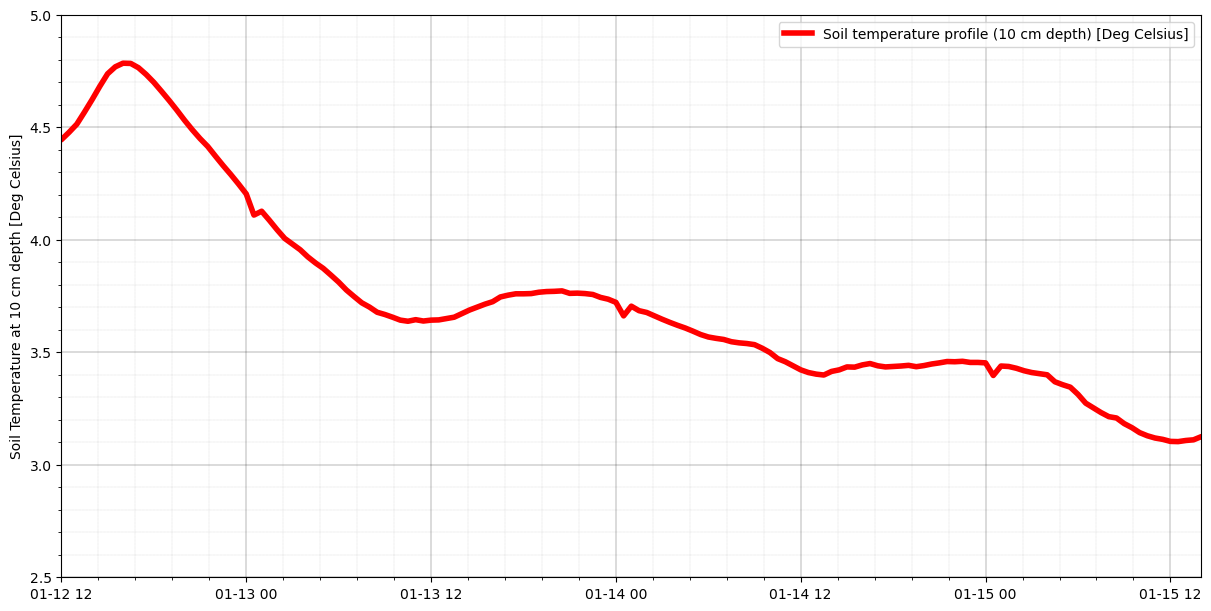

In [20]:
fig, (ax1) = plt.subplots(1, sharex=True, figsize=(12,6), constrained_layout=True)

## Datetime formatting 
# Choose your xtick format string
date_fmt = '%d %b\n%H:%M'

#ax1.plot(dff['Air temperature (mean, 30 min) [Deg Celsius]'][:],label='Mean air temperature (30 min)')
ax1.plot(dff['Soil temperature profile (10 cm depth) [Deg Celsius]'][:],'r',linewidth=4,label='Soil temperature profile (10 cm depth) [Deg Celsius]')
ax1.grid()
ax1.legend(loc=1)
ax1.set_ylabel("Soil Temperature at 10 cm depth [Deg Celsius]")
ax1.set_ylim(2.5,5)

# Turn on the minor TICKS, which are required for the minor GRID
ax1.minorticks_on()
ax1.grid(which='minor', linestyle=':', linewidth='0.1', color='black')
ax1.grid(which='major', linestyle='-', linewidth='0.2', color='black')

plt.xlim(np.datetime64('2021-01-12T12:00'),np.datetime64('2021-01-15T14:00'))
